In [1]:
import numpy as np
from matplotlib import pyplot as plt
from observationModel import *
from particleFilter import *

## Task 1: Particle Filter Implementation

My particle filter is implemented as the class `ParticleFilter` located in `particleFilter.py`. The general steps that this filter takes every time step is as follows:

1. Propagate particles through the method `propogateXs()`.
    This method propagates all particles forwards in time, while adding zero-mean normalaly distirbuted process noise drawn from covariance matrix Q. This results in the update: $ x_{t+1} = x_t + (\dot{x}_{t} + noise) * dT$, where noise is drawn from a zero-mean gaussion distribution from Q.

2. Compute weights for each particle with the method `computeWeights()`.
    This method computes a weight $w_i$ for each particle $x_i$ dependent on $p(z|x_i)$. After calculating weights for all particles, they can be normalized by the sum of all weights.

3. Resample particles with `lowVarianceSampling()`.
    This method uses the low variance sampling algorithm to resample particles according to their current distribution (defined by w's)

System Parameters:
R and Q matricies: The measurement covariance matrix R is reused from the Nonlinear Kalman Filter assignment. The process noise matrix Q was tuned for this filters performance.

        self.Q = np.diag([0.01] * 3 + [0.002] * 3 + [.1] * 3 + [.001] * 6) * 500
        self.R = np.diag([0.00558, 0.00558, 0.00558, 0.00412, 0.00412, 0.00412])
    

An example of the particle filter is shown below on dataset 2, with 500 particles. The results are plotted for the weighted average, average, and highest particle methods of extracting a state from the distribution.

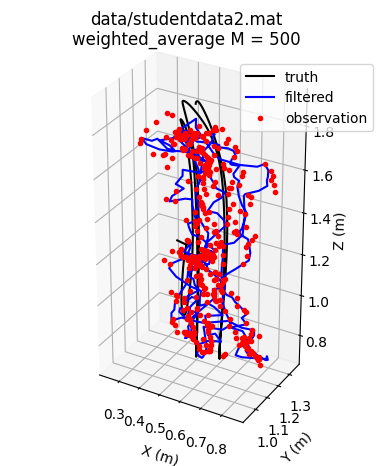

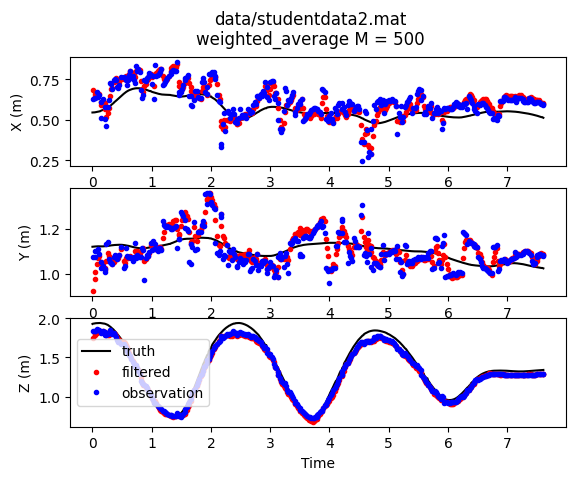

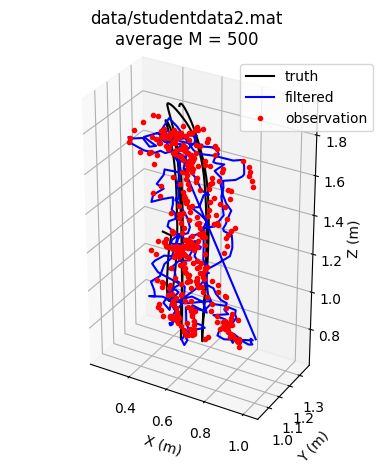

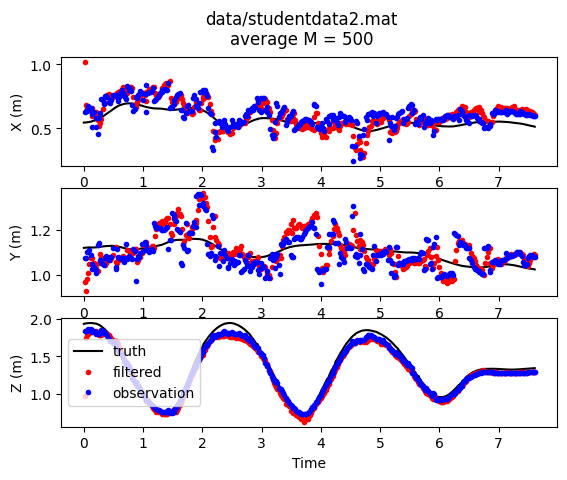

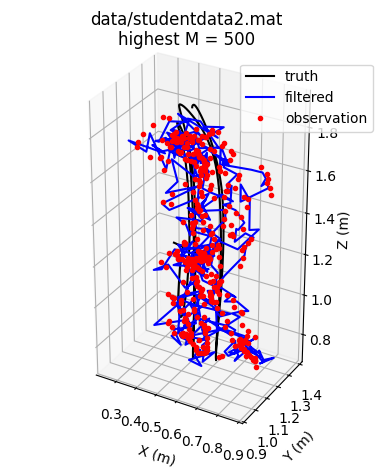

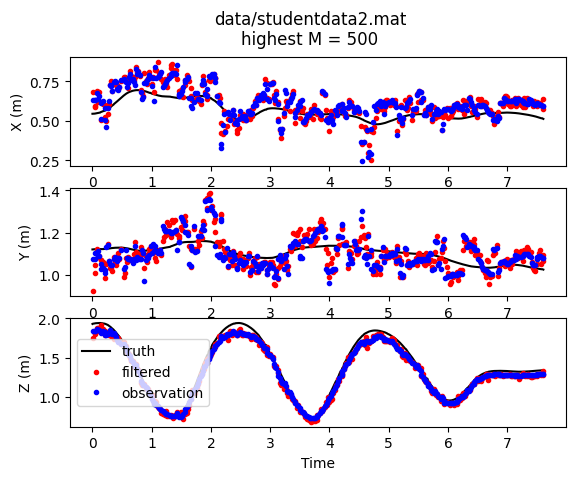

In [3]:
PF_data2 = ParticleFilter('data/studentdata2.mat', M = 500, debug=False)

PF_data2.plotResults3D(sampling='weighted_average')
PF_data2.plotResults(sampling='weighted_average')
PF_data2.plotResults3D(sampling='average')
PF_data2.plotResults(sampling='average')
PF_data2.plotResults3D(sampling='highest')
PF_data2.plotResults(sampling='highest')

## Task 2: Navigation solution and particle count investigation

As shown above, my implementation allows for using the weighted avergae, average, or highest particle samplinng methods.

A big factor in the particle filters performance is the particle count. More particles will typicaly result in a more accurate state estimation, while also increasing the computational load. Here we will investigate the performance acrosss particle counts of [250, 500, 750, 1000, 2000, 3000, 4000, 5000]. We will compare the RMSE valaues for both position and rotation across all particle sets anad datasets.

The RMSE computation is done with the method `computeRMSE()`. Below it is shown for dataset2, along with a plot comparing the errors between different sampling methods.

RMSE for data/studentdata2.mat with 500 particles
	Weighted Average:
		Position: 0.123 m 	Rotation: 0.09 rad
	Average:
		Position: 0.146 m 	Rotation: 0.107 rad
	Highest:
		Position: 0.128 m 	Rotation: 0.085 rad


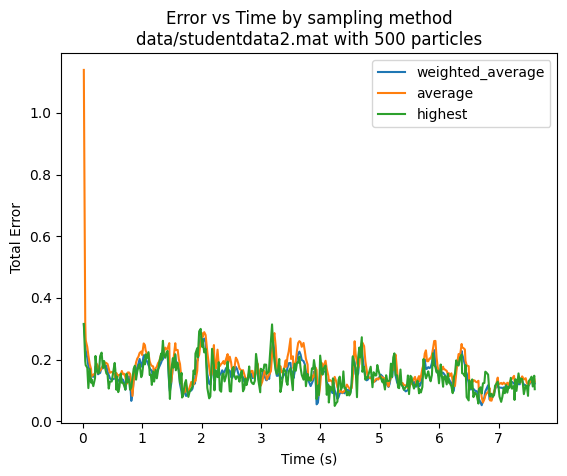

In [4]:
PF_data2.computeRMSE()
PF_data2.plotError()

After running the particle filter and computing the RMSE values across the datasets and particle count values, we obtain the following table:

![Image Title](results/results.png)

There are a couple important observations to be made from the table. First, and as expected, as the particle count increased so did the accuracy. However, this increased accuracy tends to become negligible when we reach a certain particle count. For most datasets, this happened around ~2000 particles. Some datasets showed a larger improvement in RMSE as particles grew than other, for example, dataset 1 showed more improvement than dataset 7. Additionally, there was a very noticeable increase in runtime as the particle count increased. This is important for real time systems and depending on the hardware, may limit the particle filter accuracy. The three sampling methods had very slight differences, with the weighted average method coming out on top, while there was a negligible difference between the average and highest methods.

## Task 3: Comparison to the nonlinear Kalman filter
Once the theory behind both the Unscented Kalman Filter and Particle Filter were sufficiently understood, the programing difficulty was very similar. However, tuning the UKF parameters was much easier than the PF. This is primarily because of the sensitivity I found the PF to have to the process noise covariance matrix. Without accurate process noise, my particles very quickly didn’t have a sufficient density near the true state to track the pose. When the noise was too large, the particles spread out very fast and no particles had sufficient weights given the measurements. When the noise was too small, the particles did not cover a large enough state range to track the changing measurement/truth state. While the UKF required some tunning to find optimal parameters, it was very easy to find parameters that worked. It was thus easier to get a working filter and then fine tune. The PF ran slower than the UKF, especially at the larger particle counts. This is extremely important for embedded systems that much operate in real time under compute/power constraints. In the real world, the UKF would lend itself better to systems with smaller non-linearities and more compute restrictions, while the PF if expected to show superior results on systems with higher nonlinearities, more compute resources, and with states better represented by multimodal beliefs.

![Image Title](results/UKF_results.png)

Looking at the UKF RMSE values above, we can see that the UKF performed slightly more optimally than the PF. In some datasets, such as #3, there is little difference between the UKF and the PF with sufficient particles. However, in other datasets such as #7, there is a massive performance difference between the UKF and PF with any number of particles in favor of the UKF. Of course, these results may change with more accurate tuning of either filter, but according to these results, I would choose to implement the UKF over the PF on this system due to the lighter compute requirements and smaller RMSE values.